In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "low_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

9it [00:00, 84.25it/s]

19it [00:00, 86.07it/s]

29it [00:00, 87.43it/s]

39it [00:00, 88.38it/s]

49it [00:00, 89.28it/s]

59it [00:00, 89.62it/s]

68it [00:00, 89.26it/s]

78it [00:00, 89.59it/s]

88it [00:00, 89.89it/s]

98it [00:01, 90.31it/s]

108it [00:01, 90.83it/s]

118it [00:01, 90.90it/s]

127it [00:01, 90.59it/s]

137it [00:01, 90.57it/s]

147it [00:01, 89.97it/s]

156it [00:01, 89.67it/s]

165it [00:01, 89.11it/s]

174it [00:01, 88.89it/s]

183it [00:02, 88.87it/s]

192it [00:02, 88.85it/s]

202it [00:02, 89.32it/s]

212it [00:02, 89.78it/s]

221it [00:02, 89.77it/s]

231it [00:02, 90.06it/s]

241it [00:02, 90.59it/s]

251it [00:02, 91.24it/s]

261it [00:02, 91.58it/s]

271it [00:03, 91.64it/s]

281it [00:03, 91.75it/s]

291it [00:03, 91.54it/s]

301it [00:03, 91.42it/s]

311it [00:03, 91.13it/s]

321it [00:03, 91.11it/s]

331it [00:03, 91.31it/s]

341it [00:03, 91.17it/s]

351it [00:03, 91.34it/s]

361it [00:03, 91.19it/s]

371it [00:04, 91.17it/s]

381it [00:04, 91.20it/s]

391it [00:04, 91.25it/s]

401it [00:04, 91.30it/s]

411it [00:04, 90.98it/s]

421it [00:04, 90.61it/s]

431it [00:04, 90.68it/s]

441it [00:04, 90.73it/s]

451it [00:04, 91.07it/s]

461it [00:05, 91.29it/s]

471it [00:05, 91.33it/s]

481it [00:05, 91.20it/s]

491it [00:05, 90.98it/s]

501it [00:05, 90.84it/s]

511it [00:05, 90.80it/s]

521it [00:05, 90.91it/s]

531it [00:05, 91.21it/s]

541it [00:05, 91.37it/s]

551it [00:06, 91.51it/s]

553it [00:06, 90.66it/s]


0it [00:00, ?it/s]

10it [00:00, 91.40it/s]

Number of empty sat catalogs is 0


20it [00:00, 91.17it/s]

30it [00:00, 91.26it/s]

40it [00:00, 91.34it/s]

50it [00:00, 91.29it/s]

60it [00:00, 91.36it/s]

70it [00:00, 91.62it/s]

80it [00:00, 91.77it/s]

90it [00:00, 91.76it/s]

100it [00:01, 91.66it/s]

110it [00:01, 91.84it/s]

120it [00:01, 92.06it/s]

130it [00:01, 92.25it/s]

140it [00:01, 92.19it/s]

150it [00:01, 92.21it/s]

160it [00:01, 92.15it/s]

170it [00:01, 91.92it/s]

180it [00:01, 91.93it/s]

190it [00:02, 91.98it/s]

200it [00:02, 91.67it/s]

210it [00:02, 91.46it/s]

220it [00:02, 91.46it/s]

230it [00:02, 91.48it/s]

240it [00:02, 91.37it/s]

250it [00:02, 91.62it/s]

260it [00:02, 91.76it/s]

270it [00:02, 91.96it/s]

280it [00:03, 92.00it/s]

290it [00:03, 91.94it/s]

300it [00:03, 91.87it/s]

310it [00:03, 91.37it/s]

320it [00:03, 91.31it/s]

330it [00:03, 91.48it/s]

340it [00:03, 91.59it/s]

350it [00:03, 91.63it/s]

360it [00:03, 91.66it/s]

370it [00:04, 91.44it/s]

380it [00:04, 91.33it/s]

390it [00:04, 91.27it/s]

400it [00:04, 91.01it/s]

410it [00:04, 90.54it/s]

420it [00:04, 90.16it/s]

430it [00:04, 90.17it/s]

440it [00:04, 90.56it/s]

450it [00:04, 90.88it/s]

460it [00:05, 91.10it/s]

470it [00:05, 91.22it/s]

480it [00:05, 92.39it/s]

490it [00:05, 92.52it/s]

500it [00:05, 92.59it/s]

510it [00:05, 92.68it/s]

520it [00:05, 92.71it/s]

530it [00:05, 92.74it/s]

540it [00:05, 92.59it/s]

550it [00:05, 92.46it/s]

553it [00:06, 91.67it/s]

Number of empty sat catalogs is 0


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

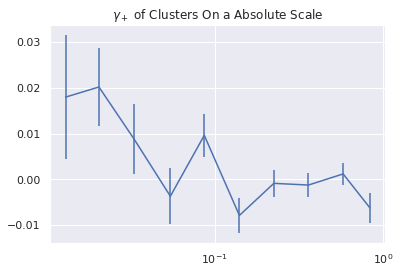

Aggregated xi:
[-1.4716 -3.5874 -2.5129  1.8475 -8.8088 12.0977  2.0582  4.0292 -4.4679
 11.6262]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -355.2425  -690.1014  -968.7822 -1463.6452 -2236.7798 -3025.4072
 -3596.3327 -3351.0279 -2052.0503  -347.1063]
------------------------------------------------------------------------------
Aggregated npairs:
[  82.  178.  285.  504.  916. 1541. 2408. 3276. 3731. 1875.]
------------------------------------------------------------------------------
Mean xi:
[-0.0179 -0.0202 -0.0088  0.0037 -0.0096  0.0079  0.0009  0.0012 -0.0012
  0.0062]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3322 -3.877  -3.3992 -2.9041 -2.4419 -1.9633 -1.4935 -1.0229 -0.55
 -0.1851]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

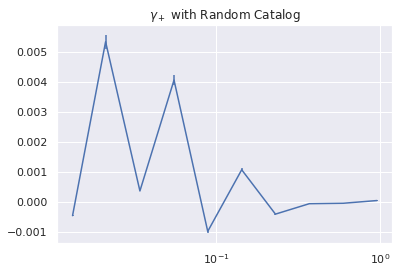

[-4.6180e-04  5.3247e-03  3.5940e-04  4.0492e-03 -9.8458e-04  1.0646e-03
 -4.1118e-04 -6.3861e-05 -4.9750e-05  4.0677e-05]
[ 1.9638e-05 -2.2643e-04 -1.5283e-05 -1.7219e-04  4.1869e-05 -4.5272e-05
  1.7485e-05  2.7156e-06  2.1156e-06 -1.7298e-06]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

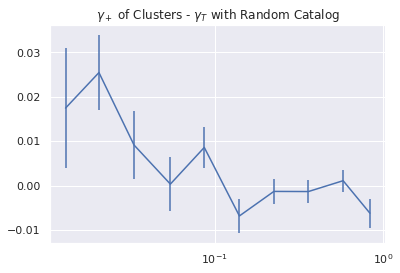

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

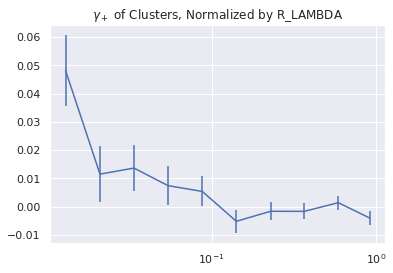

Aggregated xi:
[-2.0248 -1.5663 -3.1699 -2.7037 -3.904   6.5167  3.2535  4.9207 -5.1578
 13.8408]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -182.4336  -525.3118  -785.7254 -1056.7341 -1760.4716 -2466.3531
 -2958.1038 -2998.7897 -1936.1808  -302.8524]
------------------------------------------------------------------------------
Aggregated npairs:
[  42.  136.  232.  363.  724. 1261. 2003. 2978. 3652. 3418.]
------------------------------------------------------------------------------
Mean xi:
[-0.0482 -0.0115 -0.0137 -0.0074 -0.0054  0.0052  0.0016  0.0017 -0.0014
  0.004 ]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3437 -3.8626 -3.3867 -2.9111 -2.4316 -1.9559 -1.4768 -1.007  -0.5302
 -0.0886]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)